## Extracting data from .txt files and plotting them

(25,)


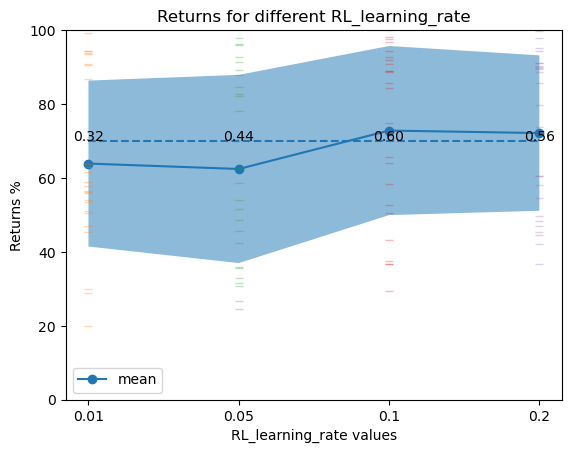

(25,)


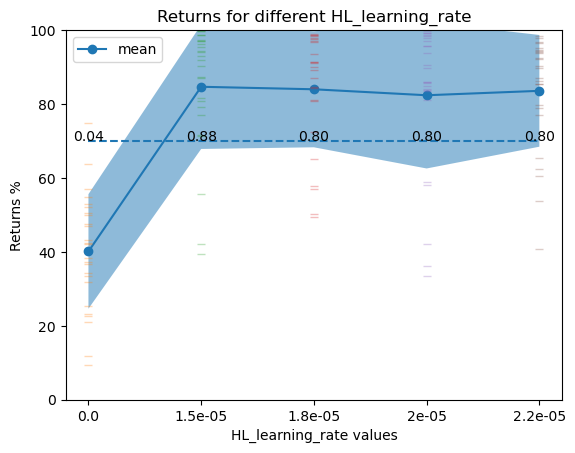

(25,)


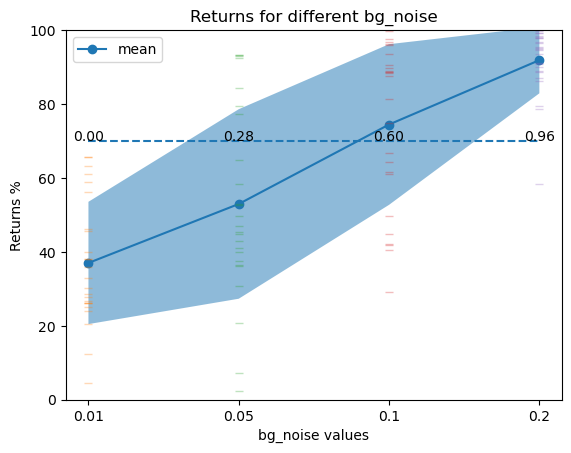

(25,)


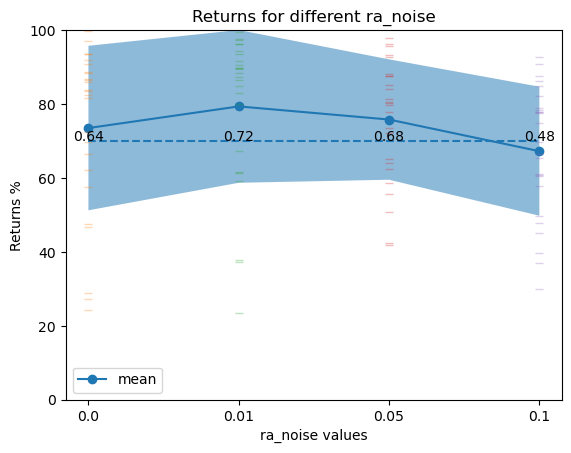

(25,)


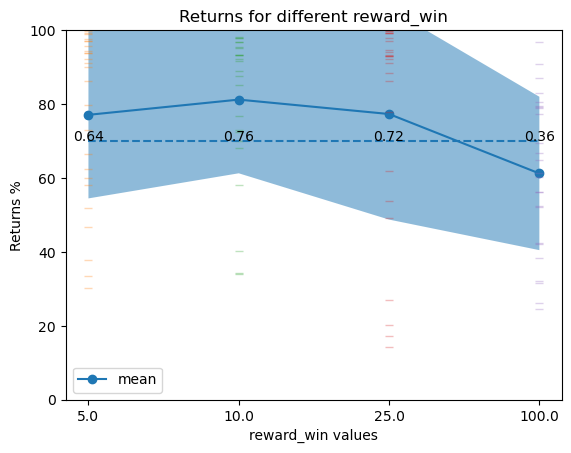

In [29]:
import numpy as np
import os
import matplotlib.pyplot as plt


def text_to_numpy(filepath):
    with open(filepath, 'r') as f:

        # next(f)  # Skip the first line
        # Use genfromtxt to handle potential missing values
        data = np.genfromtxt(f, delimiter='\t', names=True)
    array = np.array(data.tolist())
    array[:, 0]
    values = []
    for i in range(len(array)):
        if np.isnan(array[i][0]) and not np.isnan(array[i][1]):
            values.append(array[i][1])

    num_vals = len(values)
    # divide the array in num_vals parts
    buffer = np.array_split(array, num_vals)
    test_nos = len(buffer[0]) - 2
    returns = np.zeros((num_vals, test_nos))
    seeds = np.array(buffer[0][2:][:,0])
    for i in range(num_vals):
        returns[i,:] = buffer[i][2:][:,1]

    return seeds,returns, values

def plot_returns(returns, values, parameter):
    # find the percentage of the values that are above 0.7
    above_thresh = np.zeros(len(values))
    for i in range(len(values)):
        above_thresh[i] = np.sum(returns[i,:] > 0.7)
    above_thresh = above_thresh/len(returns[0,:])
    # print(above_thresh)
    # data plotting
    # plot mean and std of returns
    mean = np.mean(returns, axis=1)
    std = np.std(returns, axis=1)
    plt.plot(100*mean, label="mean", marker="o")

    # plot each data points
    print(returns[1,:].shape)
    for i in range(len(returns)):
        plt.plot(i*np.ones_like(returns[i,:]), 100*returns[i,:], alpha=0.3, marker="_", linestyle='')

    plt.hlines(70, 0, len(values)-1, linestyles='dashed')
    plt.fill_between(range(len(values)), 100*(mean-std), 100*(mean+std), alpha=0.5)
    plt.xlabel(f"{parameter} values")
    plt.xticks(np.arange(0, len(values), step=1), labels=values)
    plt.ylabel("Returns %")
    plt.ylim(0, 100)
    plt.legend()
    plt.title(f"Returns for different {parameter}")
    for i in range(len(values)):
        plt.text(i, 70, f"{above_thresh[i]:.2f}", ha='center')
    plt.show()
    return 0

def output(filepath):
    parameter = filepath.split("/")[0].split("_re")[0]
    seeds, returns, values= text_to_numpy(filepath)
    plot_returns(returns, values, parameter)

output("RL_learning_rate_results/results.txt")
output("HL_learning_rate_results/results.txt")
output("bg_noise_results/results.txt")
output("ra_noise_results/results.txt")
output("reward_win_results/results.txt")